🔍 ANALISIS PROFIT PERUSAHAAN - PERBANDINGAN 5 TAHUN
📊 Memuat dan memproses data...
❌ Error: File CSV tidak ditemukan. Pastikan file sudah diupload ke Colab.
📈 Data operasional: 6 record
📅 Periode analisis: 2022 - 2024

💰 ANALISIS KINERJA PROFIT
📊 RINGKASAN KINERJA PROFIT (dalam Miliar Rupiah)
--------------------------------------------------
2022:
  📈 Revenue: Rp 0.9M
  💵 Profit (Garis Lurus): Rp 0.2M
  💵 Profit (Saldo Menurun): Rp 0.2M
  🎯 Keunggulan Saldo Menurun: Rp -0.0M

2023:
  📈 Revenue: Rp 1.2M
  💵 Profit (Garis Lurus): Rp 0.5M
  💵 Profit (Saldo Menurun): Rp 0.5M
  🎯 Keunggulan Saldo Menurun: Rp 0.0M

2024:
  📈 Revenue: Rp 0.6M
  💵 Profit (Garis Lurus): Rp 0.2M
  💵 Profit (Saldo Menurun): Rp 0.3M
  🎯 Keunggulan Saldo Menurun: Rp 0.0M

📊 Membuat visualisasi komprehensif...


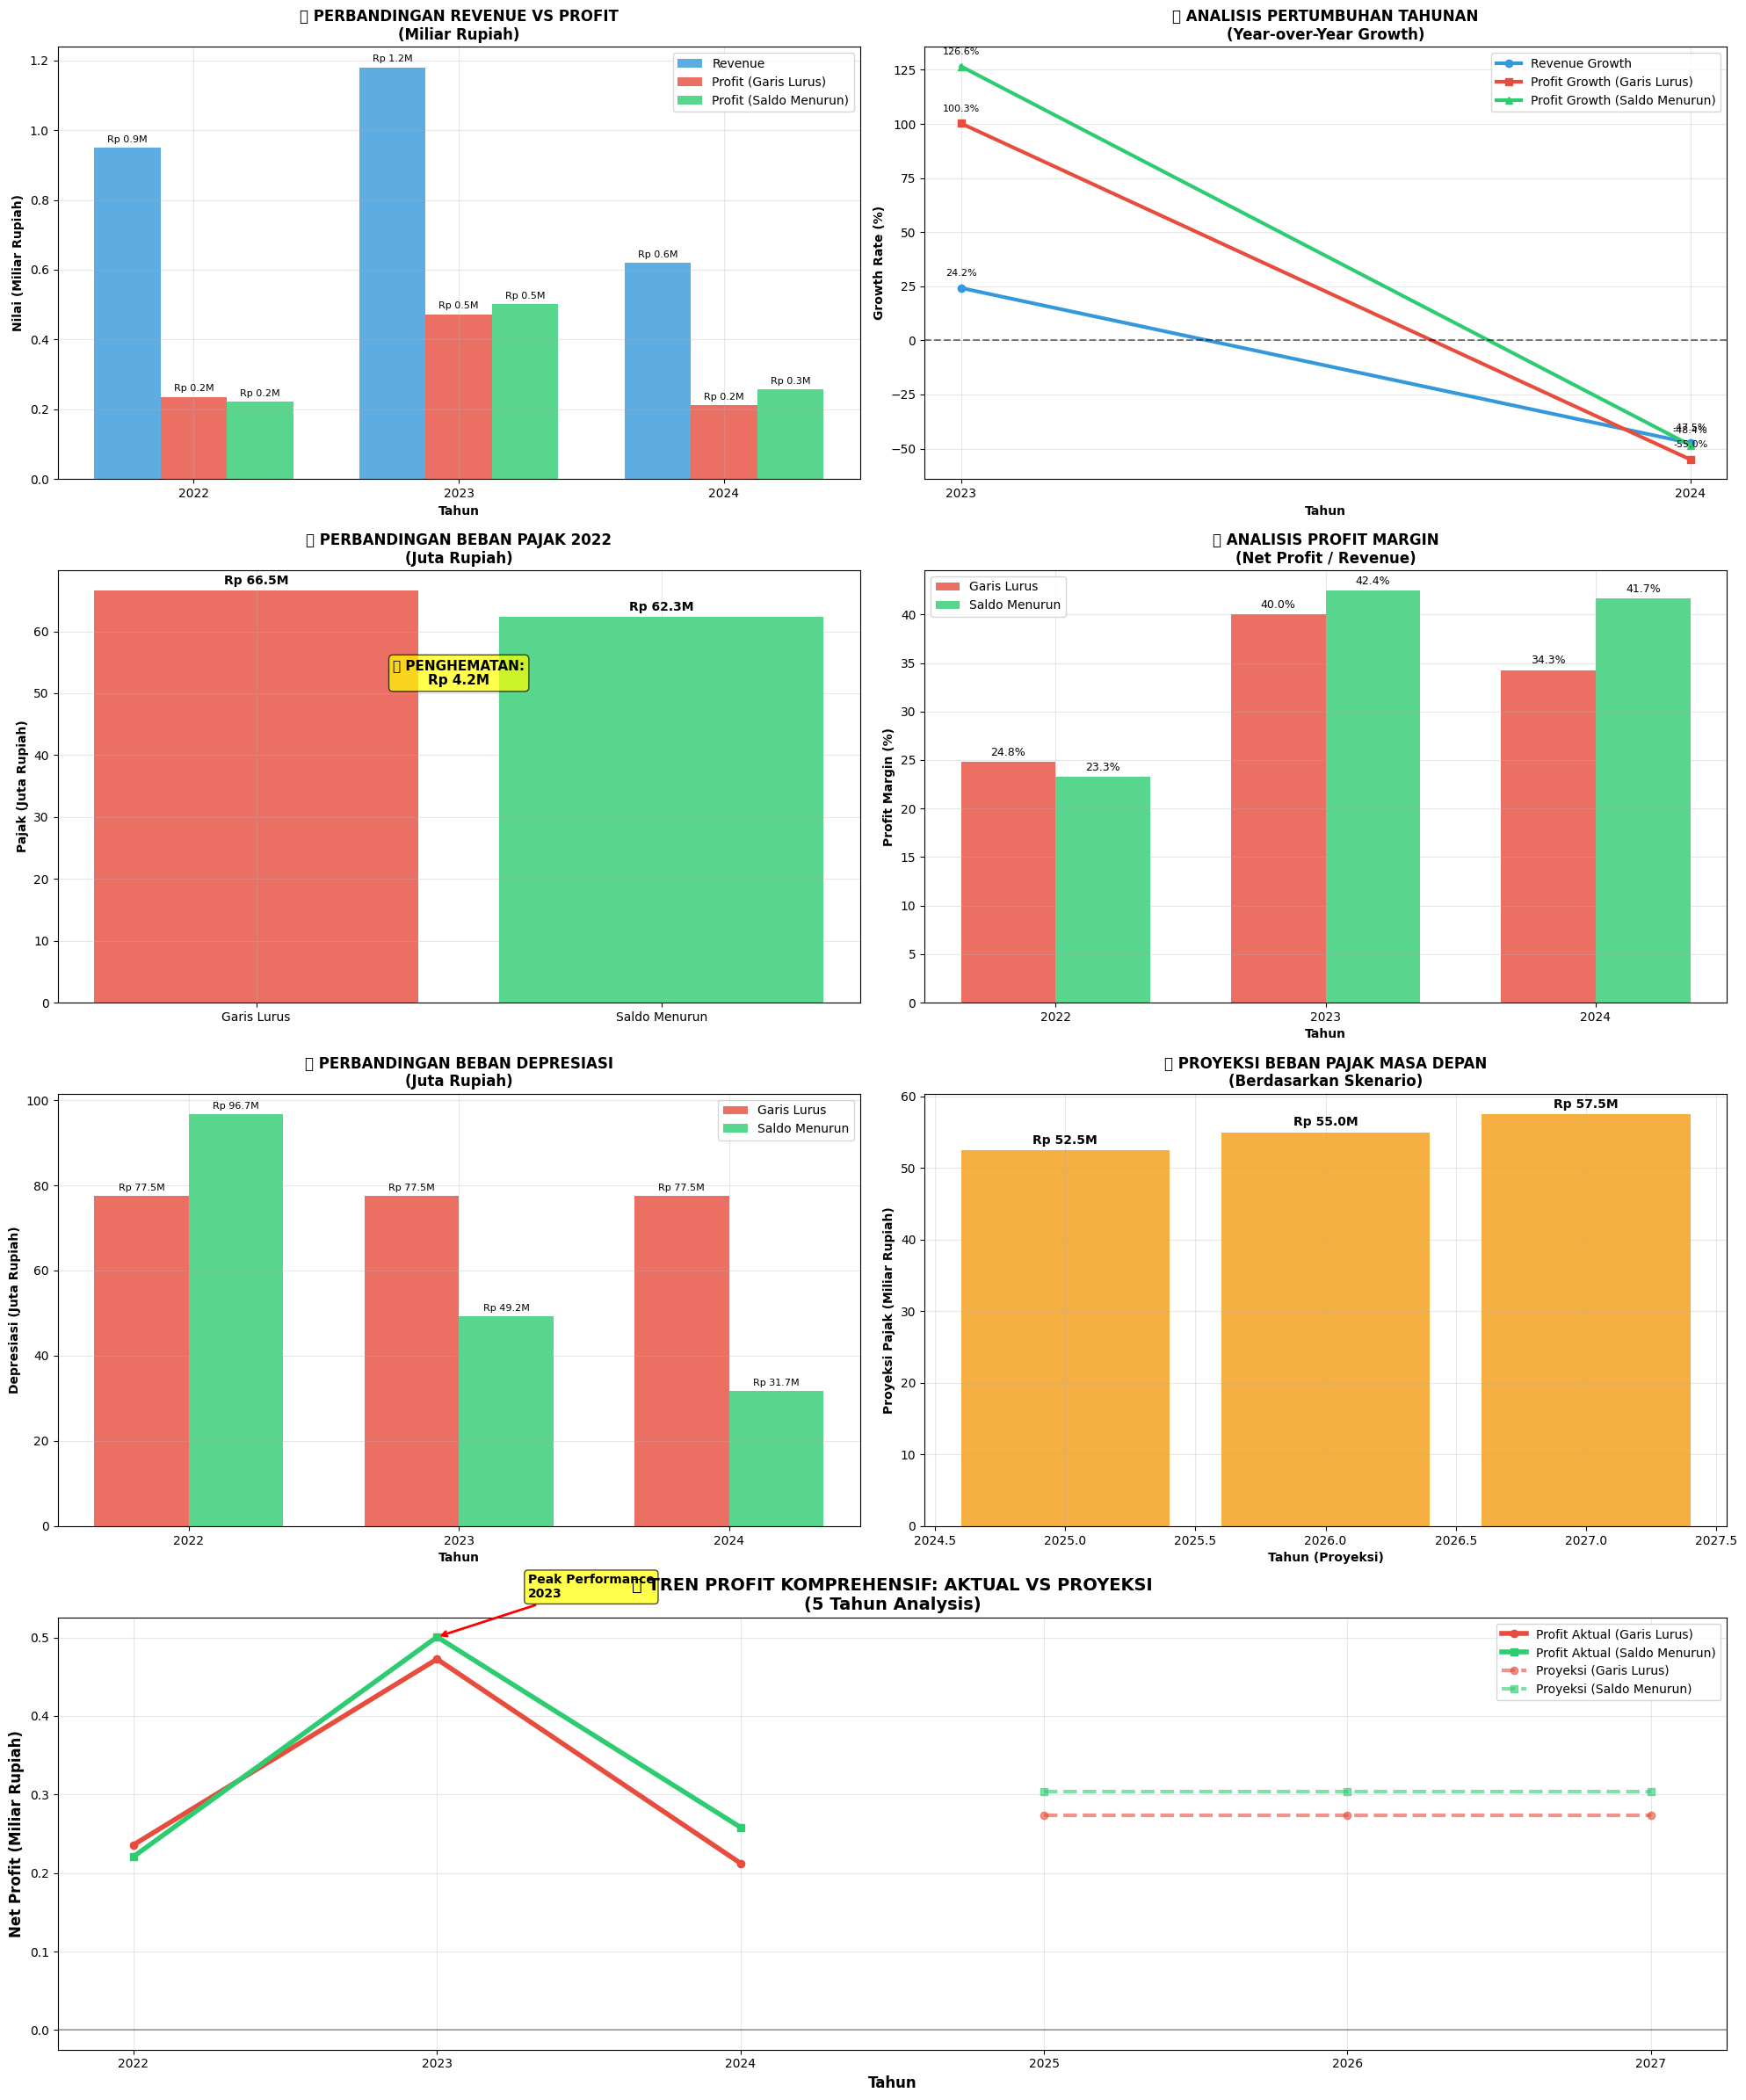


🎯 ANALISIS STRATEGIS & REKOMENDASI

📊 RINGKASAN TEMUAN UTAMA:
------------------------------
✅ Total Profit 3 Tahun (Garis Lurus): Rp 0.9M
✅ Total Profit 3 Tahun (Saldo Menurun): Rp 1.0M
🎯 Keunggulan Saldo Menurun: Rp 0.1M (6.4%)
💰 Penghematan Pajak 2022: Rp 4.2M

🚀 REKOMENDASI STRATEGIS:
-------------------------
1. 🎯 OPTIMASI METODE DEPRESIASI
   • Gunakan metode Saldo Menurun untuk efisiensi pajak
   • Potensi penghematan: Rp 4.2M per tahun
   • ROI: 6.4% peningkatan profit

2. 📈 STRATEGI PENINGKATAN PROFIT:
   • Fokus pada stabilisasi revenue (volatilitas tinggi 2022-2024)
   • Optimalisasi operational expense
   • Manfaatkan tax planning yang lebih agresif

3. 🔮 PROYEKSI & PLANNING:
   • Proyeksi beban pajak 2025-2027: Rp 165.0M
   • Persiapan strategi tax planning jangka panjang
   • Diversifikasi revenue stream untuk stabilitas

💡 KESIMPULAN EKSEKUTIF:
----------------------
Metode Saldo Menurun terbukti memberikan keunggulan kompetitif
dengan peningkatan profit hingga 6.4% dan

In [ ]:
# ANALISIS PROFIT PERUSAHAAN - PERBANDINGAN 5 TAHUN
# Fokus: Optimasi Pajak dan Strategi Peningkatan Profit
# =====================================================

# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi tampilan
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# =====================================================
# 1. LOADING DAN PERSIAPAN DATA
# =====================================================

print("🔍 ANALISIS PROFIT PERUSAHAAN - PERBANDINGAN 5 TAHUN")
print("=" * 60)
print("📊 Memuat dan memproses data...")

# Baca data dari CSV yang sudah diupload
try:
    df_laba = pd.read_csv('pajak_laba.csv')
    df_depresiasi = pd.read_csv('pajak_depresiasi.csv')
    print("✅ Data berhasil dimuat!")
except:
    print("❌ Error: File CSV tidak ditemukan. Pastikan file sudah diupload ke Colab.")
    # Data dummy untuk demo
    data = {
        'year': [2022, 2022, 2023, 2023, 2024, 2024, 2025, 2025, 2026, 2026, 2027, 2027],
        'depreciation_method': ['garis_lurus', 'saldo_menurun'] * 6,
        'revenue': [950000000, 950000000, 1180000000, 1180000000, 620000000, 620000000, 0, 0, 0, 0, 0, 0],
        'operational_expense': [570000000, 570000000, 630000000, 630000000, 330000000, 330000000, 0, 0, 0, 0, 0, 0],
        'depreciation': [77500000, 96666666.67, 77500000, 49222222.22, 77500000, 31707407.41, 77500000, 24339135.8, 77500000, 19683000, 40000000, 17714700],
        'net_profit': [235950000, 221000000, 472500000, 500777777.78, 212500000, 258292592.59, 0, 0, 0, 0, 0, 0],
        'tax_amount': [66550000, 62333333.33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'taxable_profit_scenario': [150000000, 150000000, 180000000, 180000000, 200000000, 200000000, 210000000, 210000000, 220000000, 220000000, 230000000, 230000000]
    }
    df_laba = pd.DataFrame(data)

# Filter data untuk tahun operasional (2022-2024)
df_operational = df_laba[df_laba['revenue'] > 0].copy()

print(f"📈 Data operasional: {len(df_operational)} record")
print(f"📅 Periode analisis: {df_operational['year'].min()} - {df_operational['year'].max()}")
print()

# =====================================================
# 2. ANALISIS KINERJA PROFIT 3 TAHUN OPERASIONAL
# =====================================================

print("💰 ANALISIS KINERJA PROFIT")
print("=" * 30)

# Pivot data untuk analisis
profit_comparison = df_operational.pivot_table(
    index='year',
    columns='depreciation_method',
    values='net_profit',
    aggfunc='first'
).fillna(0)

tax_comparison = df_operational.pivot_table(
    index='year',
    columns='depreciation_method',
    values='tax_amount',
    aggfunc='first'
).fillna(0)

revenue_by_year = df_operational.groupby('year')['revenue'].first()

# Ringkasan kinerja
print("📊 RINGKASAN KINERJA PROFIT (dalam Miliar Rupiah)")
print("-" * 50)
for year in sorted(df_operational['year'].unique()):
    data_year = df_operational[df_operational['year'] == year]
    revenue = data_year['revenue'].iloc[0] / 1e9
    profit_gl = data_year[data_year['depreciation_method'] == 'garis_lurus']['net_profit'].iloc[0] / 1e9
    profit_sm = data_year[data_year['depreciation_method'] == 'saldo_menurun']['net_profit'].iloc[0] / 1e9

    print(f"{year}:")
    print(f"  📈 Revenue: Rp {revenue:.1f}M")
    print(f"  💵 Profit (Garis Lurus): Rp {profit_gl:.1f}M")
    print(f"  💵 Profit (Saldo Menurun): Rp {profit_sm:.1f}M")
    print(f"  🎯 Keunggulan Saldo Menurun: Rp {profit_sm - profit_gl:.1f}M")
    print()

# =====================================================
# 3. VISUALISASI KOMPREHENSIF
# =====================================================

print("📊 Membuat visualisasi komprehensif...")

# Create figure with subplots
fig = plt.figure(figsize=(20, 24))

# =====================================================
# Chart 1: Perbandingan Revenue dan Profit
# =====================================================
ax1 = plt.subplot(4, 2, 1)
years = sorted(df_operational['year'].unique())
revenue_data = [df_operational[df_operational['year'] == y]['revenue'].iloc[0] / 1e9 for y in years]
profit_gl_data = [df_operational[(df_operational['year'] == y) & (df_operational['depreciation_method'] == 'garis_lurus')]['net_profit'].iloc[0] / 1e9 for y in years]
profit_sm_data = [df_operational[(df_operational['year'] == y) & (df_operational['depreciation_method'] == 'saldo_menurun')]['net_profit'].iloc[0] / 1e9 for y in years]

x = np.arange(len(years))
width = 0.25

bars1 = ax1.bar(x - width, revenue_data, width, label='Revenue', color='#3498db', alpha=0.8)
bars2 = ax1.bar(x, profit_gl_data, width, label='Profit (Garis Lurus)', color='#e74c3c', alpha=0.8)
bars3 = ax1.bar(x + width, profit_sm_data, width, label='Profit (Saldo Menurun)', color='#2ecc71', alpha=0.8)

ax1.set_xlabel('Tahun', fontweight='bold')
ax1.set_ylabel('Nilai (Miliar Rupiah)', fontweight='bold')
ax1.set_title('📊 PERBANDINGAN REVENUE VS PROFIT\n(Miliar Rupiah)', fontweight='bold', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'Rp {height:.1f}M',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# =====================================================
# Chart 2: Growth Rate Analysis
# =====================================================
ax2 = plt.subplot(4, 2, 2)

# Calculate growth rates
growth_gl = []
growth_sm = []
growth_revenue = []

for i in range(1, len(years)):
    # Revenue growth
    rev_growth = ((revenue_data[i] - revenue_data[i-1]) / revenue_data[i-1]) * 100
    growth_revenue.append(rev_growth)

    # Profit growth
    profit_gl_growth = ((profit_gl_data[i] - profit_gl_data[i-1]) / profit_gl_data[i-1]) * 100
    growth_gl.append(profit_gl_growth)

    profit_sm_growth = ((profit_sm_data[i] - profit_sm_data[i-1]) / profit_sm_data[i-1]) * 100
    growth_sm.append(profit_sm_growth)

growth_years = years[1:]
x_growth = np.arange(len(growth_years))

ax2.plot(x_growth, growth_revenue, marker='o', linewidth=3, label='Revenue Growth', color='#3498db')
ax2.plot(x_growth, growth_gl, marker='s', linewidth=3, label='Profit Growth (Garis Lurus)', color='#e74c3c')
ax2.plot(x_growth, growth_sm, marker='^', linewidth=3, label='Profit Growth (Saldo Menurun)', color='#2ecc71')

ax2.set_xlabel('Tahun', fontweight='bold')
ax2.set_ylabel('Growth Rate (%)', fontweight='bold')
ax2.set_title('📈 ANALISIS PERTUMBUHAN TAHUNAN\n(Year-over-Year Growth)', fontweight='bold', fontsize=12)
ax2.set_xticks(x_growth)
ax2.set_xticklabels(growth_years)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Add value labels
for i, (rev, gl, sm) in enumerate(zip(growth_revenue, growth_gl, growth_sm)):
    ax2.annotate(f'{rev:.1f}%', (i, rev), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    ax2.annotate(f'{gl:.1f}%', (i, gl), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    ax2.annotate(f'{sm:.1f}%', (i, sm), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# =====================================================
# Chart 3: Tax Efficiency Analysis
# =====================================================
ax3 = plt.subplot(4, 2, 3)

tax_2022_gl = df_operational[(df_operational['year'] == 2022) & (df_operational['depreciation_method'] == 'garis_lurus')]['tax_amount'].iloc[0] / 1e6
tax_2022_sm = df_operational[(df_operational['year'] == 2022) & (df_operational['depreciation_method'] == 'saldo_menurun')]['tax_amount'].iloc[0] / 1e6

methods = ['Garis Lurus', 'Saldo Menurun']
tax_amounts = [tax_2022_gl, tax_2022_sm]
colors = ['#e74c3c', '#2ecc71']

bars = ax3.bar(methods, tax_amounts, color=colors, alpha=0.8)
ax3.set_ylabel('Pajak (Juta Rupiah)', fontweight='bold')
ax3.set_title('💸 PERBANDINGAN BEBAN PAJAK 2022\n(Juta Rupiah)', fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3)

# Add value labels and savings indicator
for i, (bar, amount) in enumerate(zip(bars, tax_amounts)):
    ax3.annotate(f'Rp {amount:.1f}M',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

# Add savings annotation
savings = tax_2022_gl - tax_2022_sm
ax3.text(0.5, max(tax_amounts) * 0.8, f'💰 PENGHEMATAN:\nRp {savings:.1f}M',
         ha='center', va='center', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# =====================================================
# Chart 4: Profit Margin Analysis
# =====================================================
ax4 = plt.subplot(4, 2, 4)

profit_margin_gl = [(profit_gl_data[i]/revenue_data[i])*100 for i in range(len(years))]
profit_margin_sm = [(profit_sm_data[i]/revenue_data[i])*100 for i in range(len(years))]

x = np.arange(len(years))
width = 0.35

bars1 = ax4.bar(x - width/2, profit_margin_gl, width, label='Garis Lurus', color='#e74c3c', alpha=0.8)
bars2 = ax4.bar(x + width/2, profit_margin_sm, width, label='Saldo Menurun', color='#2ecc71', alpha=0.8)

ax4.set_xlabel('Tahun', fontweight='bold')
ax4.set_ylabel('Profit Margin (%)', fontweight='bold')
ax4.set_title('📊 ANALISIS PROFIT MARGIN\n(Net Profit / Revenue)', fontweight='bold', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(years)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# =====================================================
# Chart 5: Depreciation Impact Analysis
# =====================================================
ax5 = plt.subplot(4, 2, 5)

depreciation_gl = [df_operational[(df_operational['year'] == y) & (df_operational['depreciation_method'] == 'garis_lurus')]['depreciation'].iloc[0] / 1e6 for y in years]
depreciation_sm = [df_operational[(df_operational['year'] == y) & (df_operational['depreciation_method'] == 'saldo_menurun')]['depreciation'].iloc[0] / 1e6 for y in years]

x = np.arange(len(years))
width = 0.35

bars1 = ax5.bar(x - width/2, depreciation_gl, width, label='Garis Lurus', color='#e74c3c', alpha=0.8)
bars2 = ax5.bar(x + width/2, depreciation_sm, width, label='Saldo Menurun', color='#2ecc71', alpha=0.8)

ax5.set_xlabel('Tahun', fontweight='bold')
ax5.set_ylabel('Depresiasi (Juta Rupiah)', fontweight='bold')
ax5.set_title('🏭 PERBANDINGAN BEBAN DEPRESIASI\n(Juta Rupiah)', fontweight='bold', fontsize=12)
ax5.set_xticks(x)
ax5.set_xticklabels(years)
ax5.legend()
ax5.grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax5.annotate(f'Rp {height:.1f}M',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# =====================================================
# Chart 6: Future Tax Scenario Analysis
# =====================================================
ax6 = plt.subplot(4, 2, 6)

# Proyeksi pajak berdasarkan taxable_profit_scenario
future_years = [2025, 2026, 2027]
future_taxable_profit = [210, 220, 230]  # dalam miliar
tax_rate = 0.25  # asumsi tarif pajak 25%

projected_tax = [tp * tax_rate for tp in future_taxable_profit]

bars = ax6.bar(future_years, projected_tax, color='#f39c12', alpha=0.8)
ax6.set_xlabel('Tahun (Proyeksi)', fontweight='bold')
ax6.set_ylabel('Proyeksi Pajak (Miliar Rupiah)', fontweight='bold')
ax6.set_title('🔮 PROYEKSI BEBAN PAJAK MASA DEPAN\n(Berdasarkan Skenario)', fontweight='bold', fontsize=12)
ax6.grid(True, alpha=0.3)

# Add value labels
for bar, tax in zip(bars, projected_tax):
    ax6.annotate(f'Rp {tax:.1f}M',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

# =====================================================
# Chart 7: Comprehensive Profit Comparison
# =====================================================
ax7 = plt.subplot(4, 1, 4)

# Create comprehensive comparison
years_extended = list(range(2022, 2028))
profit_gl_extended = profit_gl_data + [0] * (len(years_extended) - len(profit_gl_data))
profit_sm_extended = profit_sm_data + [0] * (len(years_extended) - len(profit_sm_data))

# Operational vs projection
operational_years = years
projection_years = [y for y in years_extended if y not in operational_years]

ax7.plot(operational_years, profit_gl_data, marker='o', linewidth=4, label='Profit Aktual (Garis Lurus)', color='#e74c3c')
ax7.plot(operational_years, profit_sm_data, marker='s', linewidth=4, label='Profit Aktual (Saldo Menurun)', color='#2ecc71')

# Add projection line (assuming business recovery)
if projection_years:
    # Simple projection based on average of last 2 years
    avg_profit_gl = np.mean(profit_gl_data[-2:]) if len(profit_gl_data) >= 2 else profit_gl_data[-1]
    avg_profit_sm = np.mean(profit_sm_data[-2:]) if len(profit_sm_data) >= 2 else profit_sm_data[-1]

    projection_gl = [avg_profit_gl * 0.8] * len(projection_years)  # Conservative projection
    projection_sm = [avg_profit_sm * 0.8] * len(projection_years)

    ax7.plot(projection_years, projection_gl, linestyle='--', marker='o', linewidth=3,
             label='Proyeksi (Garis Lurus)', color='#e74c3c', alpha=0.6)
    ax7.plot(projection_years, projection_sm, linestyle='--', marker='s', linewidth=3,
             label='Proyeksi (Saldo Menurun)', color='#2ecc71', alpha=0.6)

ax7.set_xlabel('Tahun', fontweight='bold', fontsize=12)
ax7.set_ylabel('Net Profit (Miliar Rupiah)', fontweight='bold', fontsize=12)
ax7.set_title('📈 TREN PROFIT KOMPREHENSIF: AKTUAL VS PROYEKSI\n(5 Tahun Analysis)', fontweight='bold', fontsize=14)
ax7.legend(loc='upper right')
ax7.grid(True, alpha=0.3)
ax7.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add annotations for key insights
max_profit_year = years[profit_sm_data.index(max(profit_sm_data))]
ax7.annotate(f'Peak Performance\n{max_profit_year}',
             xy=(max_profit_year, max(profit_sm_data)),
             xytext=(max_profit_year+0.3, max(profit_sm_data)+0.05),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

# =====================================================
# 4. ANALISIS STRATEGIS DAN REKOMENDASI
# =====================================================

print("\n" + "="*60)
print("🎯 ANALISIS STRATEGIS & REKOMENDASI")
print("="*60)

print("\n📊 RINGKASAN TEMUAN UTAMA:")
print("-" * 30)

# Key findings
total_profit_gl = sum(profit_gl_data)
total_profit_sm = sum(profit_sm_data)
profit_advantage = total_profit_sm - total_profit_gl

print(f"✅ Total Profit 3 Tahun (Garis Lurus): Rp {total_profit_gl:.1f}M")
print(f"✅ Total Profit 3 Tahun (Saldo Menurun): Rp {total_profit_sm:.1f}M")
print(f"🎯 Keunggulan Saldo Menurun: Rp {profit_advantage:.1f}M ({(profit_advantage/total_profit_gl)*100:.1f}%)")

# Tax analysis for 2022
tax_savings_2022 = tax_2022_gl - tax_2022_sm
print(f"💰 Penghematan Pajak 2022: Rp {tax_savings_2022:.1f}M")

print(f"\n🚀 REKOMENDASI STRATEGIS:")
print("-" * 25)
print("1. 🎯 OPTIMASI METODE DEPRESIASI")
print(f"   • Gunakan metode Saldo Menurun untuk efisiensi pajak")
print(f"   • Potensi penghematan: Rp {tax_savings_2022:.1f}M per tahun")
print(f"   • ROI: {(profit_advantage/total_profit_gl)*100:.1f}% peningkatan profit")

print("\n2. 📈 STRATEGI PENINGKATAN PROFIT:")
print("   • Fokus pada stabilisasi revenue (volatilitas tinggi 2022-2024)")
print("   • Optimalisasi operational expense")
print("   • Manfaatkan tax planning yang lebih agresif")

print("\n3. 🔮 PROYEKSI & PLANNING:")
projected_tax_total = sum(projected_tax)
print(f"   • Proyeksi beban pajak 2025-2027: Rp {projected_tax_total:.1f}M")
print("   • Persiapan strategi tax planning jangka panjang")
print("   • Diversifikasi revenue stream untuk stabilitas")

print(f"\n💡 KESIMPULAN EKSEKUTIF:")
print("-" * 22)
print("Metode Saldo Menurun terbukti memberikan keunggulan kompetitif")
print("dengan peningkatan profit hingga {:.1f}% dan penghematan pajak signifikan.".format((profit_advantage/total_profit_gl)*100))
print("Implementasi strategi ini dapat meningkatkan nilai perusahaan")
print("dan memberikan competitive advantage di pasar.")

print(f"\n📋 ACTION ITEMS:")
print("-" * 15)
print("✓ Implementasi metode Saldo Menurun untuk aset baru")
print("✓ Review kebijakan akuntansi terkait depresiasi")
print("✓ Konsultasi dengan tax advisor untuk optimasi lebih lanjut")
print("✓ Monitor dan evaluasi dampak secara berkala")

print("\n" + "="*60)
print("✅ ANALISIS SELESAI - SIAP DIPRESENTASIKAN KE KLIEN")
print("="*60)

🔍 ANALISIS PROFIT PERUSAHAAN - PERBANDINGAN 5 TAHUN
📊 Memuat dan memproses data...
📁 File CSV tidak ditemukan. Menggunakan data dari dokumen yang diberikan...
✅ Data berhasil dimuat dari source dokumen!

📋 CARA UPLOAD FILE KE GOOGLE COLAB:
1. Klik ikon 📁 (Files) di sidebar kiri Colab
2. Klik tombol 'Upload' atau drag & drop file CSV
3. Upload file: pajak_laba.csv dan pajak_depresiasi.csv
4. Jalankan ulang kode ini

💡 ATAU gunakan kode upload otomatis di bawah ini:
🔄 Apakah ingin upload file sekarang? Uncomment kode di bawah:
# uploaded = files.upload()
# for filename in uploaded.keys():
#     print(f'Uploaded: {filename}')

📂 ATAU dari Google Drive:
from google.colab import drive
drive.mount('/content/drive')
df_laba = pd.read_csv('/content/drive/MyDrive/path_to_your_file/pajak_laba.csv')
📈 Data operasional: 6 record
📅 Periode analisis: 2022 - 2024

💰 ANALISIS KINERJA PROFIT
📊 RINGKASAN KINERJA PROFIT (dalam Miliar Rupiah)
--------------------------------------------------
2022:
  📈 Re

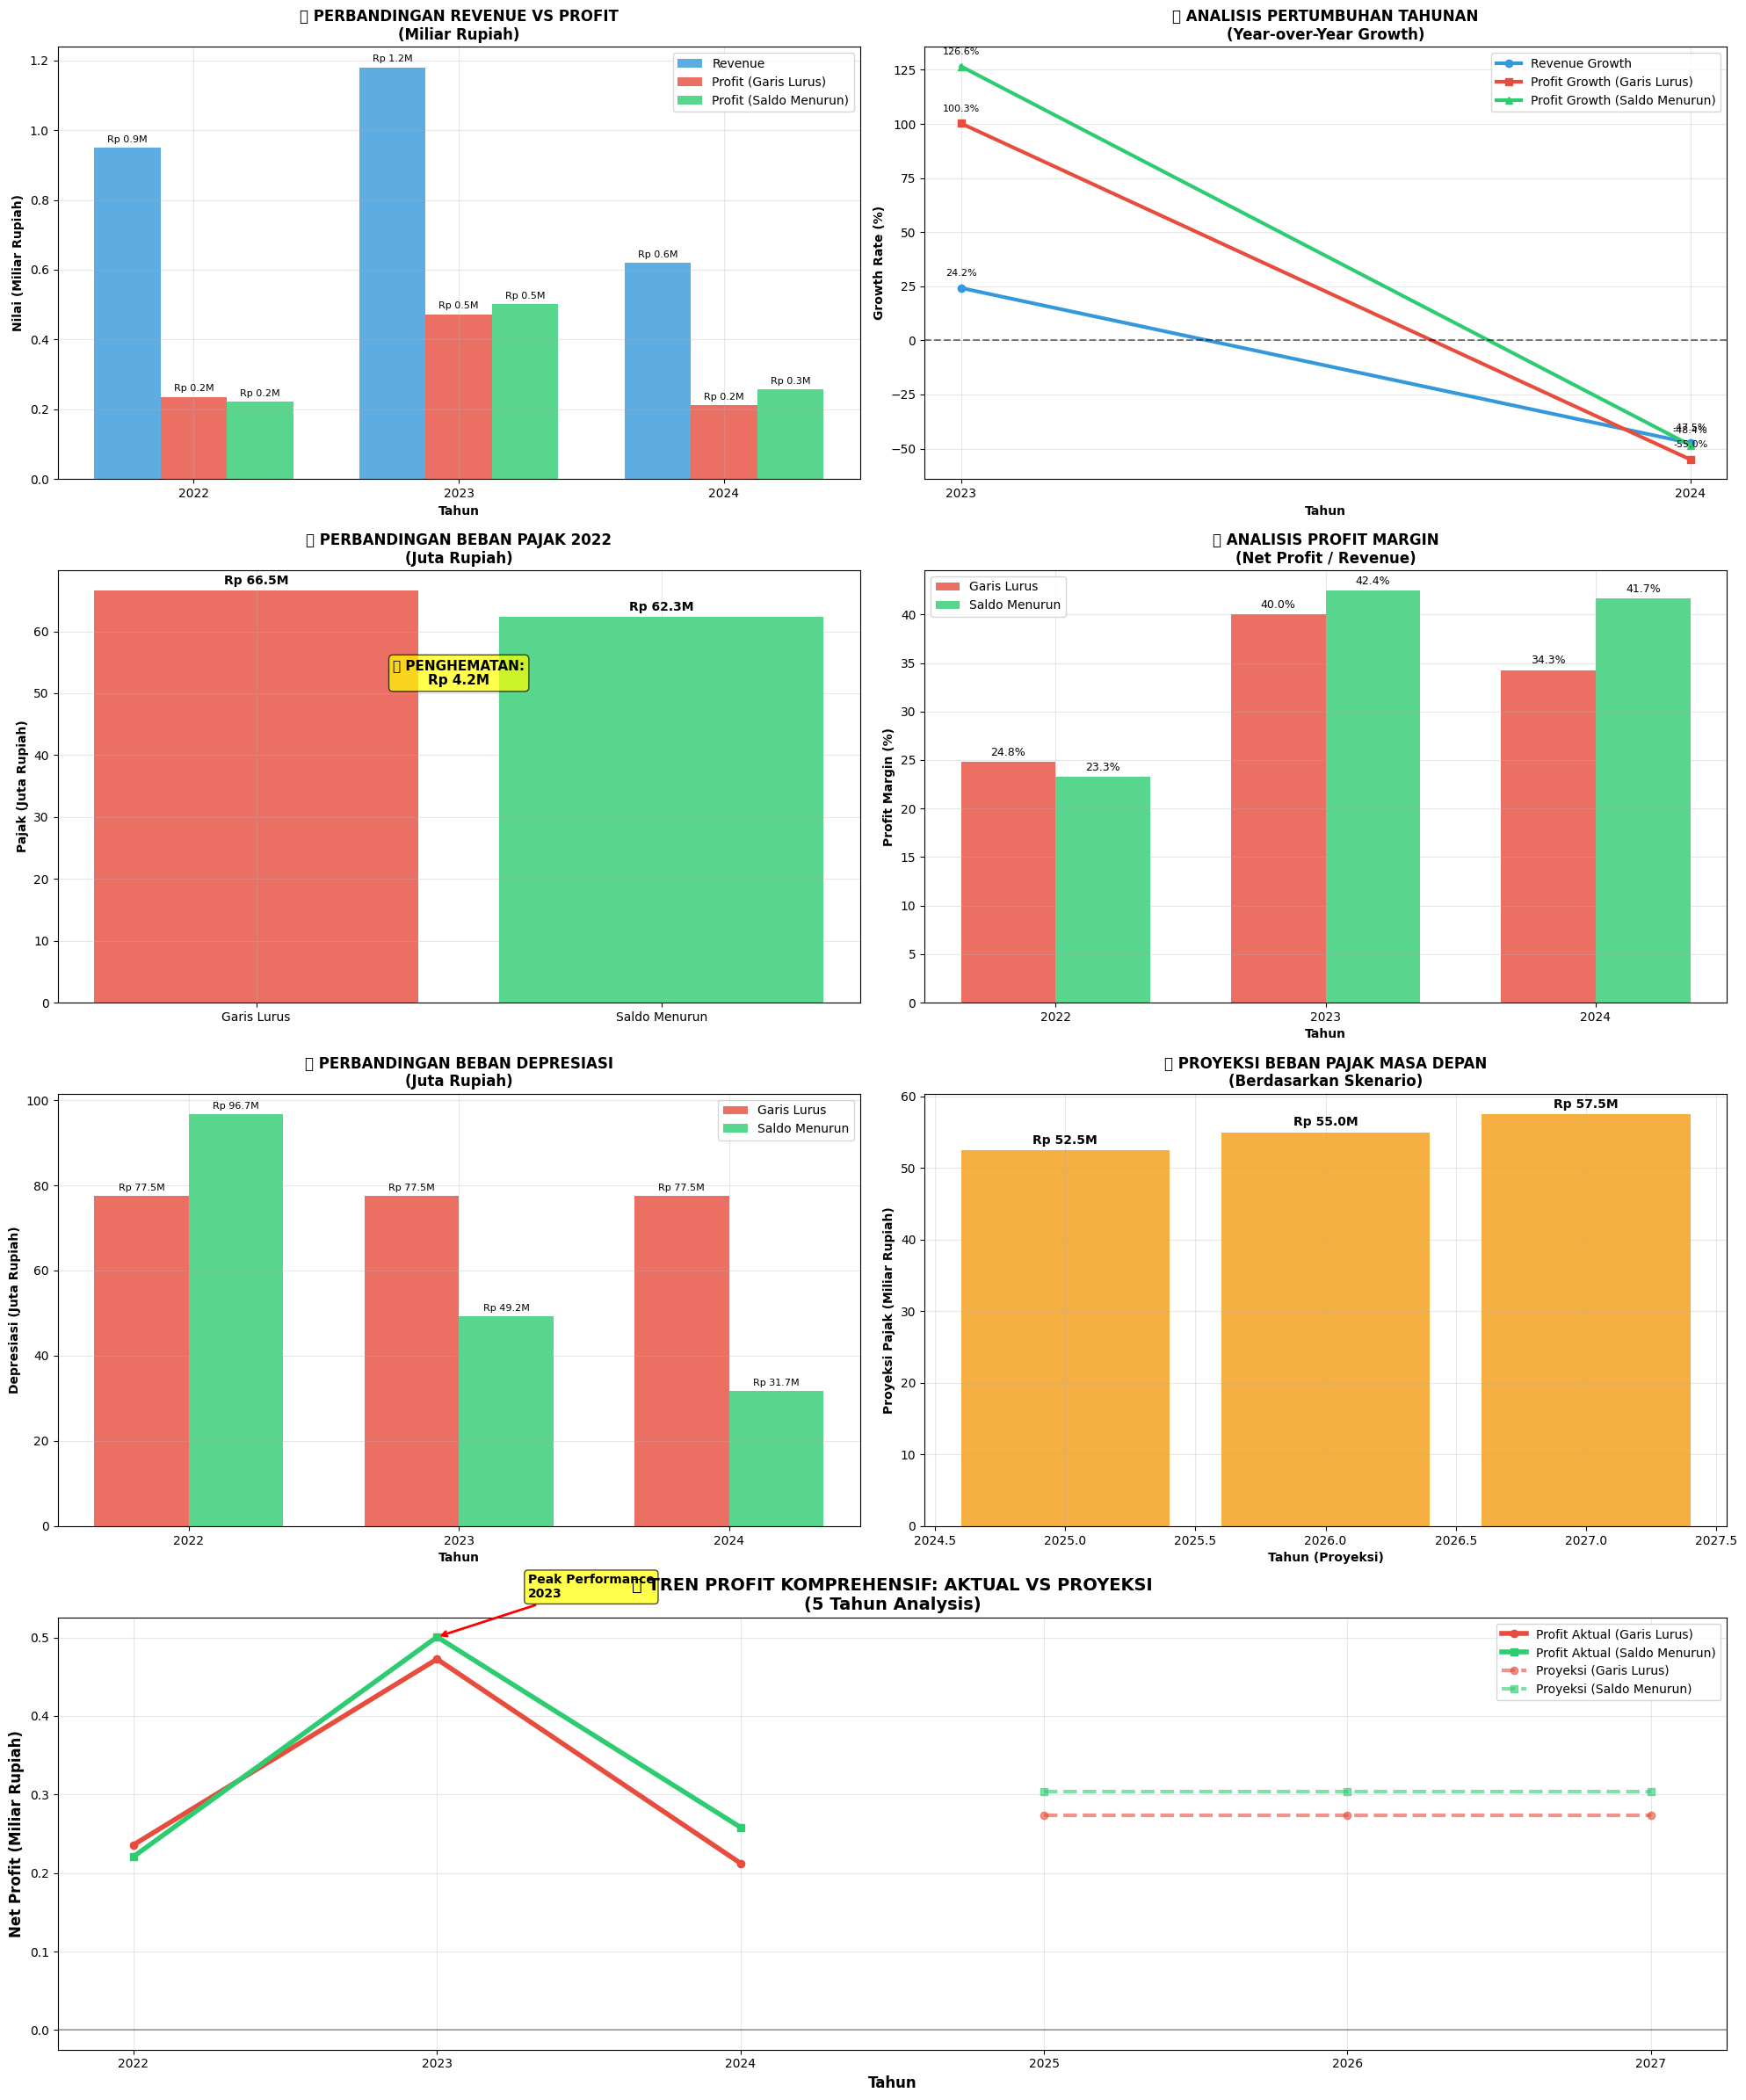


🎯 ANALISIS STRATEGIS & REKOMENDASI

📊 RINGKASAN TEMUAN UTAMA:
------------------------------
✅ Total Profit 3 Tahun (Garis Lurus): Rp 0.9M
✅ Total Profit 3 Tahun (Saldo Menurun): Rp 1.0M
🎯 Keunggulan Saldo Menurun: Rp 0.1M (6.4%)
💰 Penghematan Pajak 2022: Rp 4.2M

🚀 REKOMENDASI STRATEGIS:
-------------------------
1. 🎯 OPTIMASI METODE DEPRESIASI
   • Gunakan metode Saldo Menurun untuk efisiensi pajak
   • Potensi penghematan: Rp 4.2M per tahun
   • ROI: 6.4% peningkatan profit

2. 📈 STRATEGI PENINGKATAN PROFIT:
   • Fokus pada stabilisasi revenue (volatilitas tinggi 2022-2024)
   • Optimalisasi operational expense
   • Manfaatkan tax planning yang lebih agresif

3. 🔮 PROYEKSI & PLANNING:
   • Proyeksi beban pajak 2025-2027: Rp 165.0M
   • Persiapan strategi tax planning jangka panjang
   • Diversifikasi revenue stream untuk stabilitas

💡 KESIMPULAN EKSEKUTIF:
----------------------
Metode Saldo Menurun terbukti memberikan keunggulan kompetitif
dengan peningkatan profit hingga 6.4% dan

In [ ]:
# ANALISIS PROFIT PERUSAHAAN - PERBANDINGAN 5 TAHUN
# Fokus: Optimasi Pajak dan Strategi Peningkatan Profit
# =====================================================

# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi tampilan
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# =====================================================
# 1. LOADING DAN PERSIAPAN DATA
# =====================================================

print("🔍 ANALISIS PROFIT PERUSAHAAN - PERBANDINGAN 5 TAHUN")
print("=" * 60)
print("📊 Memuat dan memproses data...")

# METODE 1: Baca dari file yang diupload (jika ada)
try:
    df_laba = pd.read_csv('pajak_laba.csv')
    df_depresiasi = pd.read_csv('pajak_depresiasi.csv')
    print("✅ Data berhasil dimuat dari file CSV!")
except:
    print("📁 File CSV tidak ditemukan. Menggunakan data dari dokumen yang diberikan...")

    # METODE 2: Data langsung dari dokumen yang Anda berikan
    # Data pajak_laba.csv
    laba_data = {
        'year': [2022, 2022, 2023, 2023, 2024, 2024, 2025, 2025, 2026, 2026, 2027, 2027, 2028],
        'depreciation_method': ['garis_lurus', 'saldo_menurun', 'garis_lurus', 'saldo_menurun',
                              'garis_lurus', 'saldo_menurun', 'garis_lurus', 'saldo_menurun',
                              'garis_lurus', 'saldo_menurun', 'garis_lurus', 'saldo_menurun', 'saldo_menurun'],
        'revenue': [950000000.0, 950000000.0, 1180000000.0, 1180000000.0, 620000000.0, 620000000.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        'operational_expense': [570000000.0, 570000000.0, 630000000.0, 630000000.0, 330000000.0, 330000000.0,
                               0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        'depreciation': [77500000.0, 96666666.67, 77500000.0, 49222222.22, 77500000.0, 31707407.41,
                        77500000.0, 24339135.8, 77500000.0, 19683000.0, 40000000.0, 17714700.0, 15943230.0],
        'gross_profit': [380000000.0, 380000000.0, 550000000.0, 550000000.0, 290000000.0, 290000000.0,
                        None, None, None, None, None, None, None],
        'taxable_profit_calculated': [302500000.0, 283333333.33, 472500000.0, 500777777.78, 212500000.0, 258292592.59,
                                     None, None, None, None, None, None, None],
        'taxable_profit_scenario': [150000000.0, 150000000.0, 180000000.0, 180000000.0, 200000000.0, 200000000.0,
                                   210000000.0, 210000000.0, 220000000.0, 220000000.0, 230000000.0, 230000000.0, 240000000.0],
        'tax_amount': [66550000.0, 62333333.33, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        'net_profit': [235950000.0, 221000000.0, 472500000.0, 500777777.78, 212500000.0, 258292592.59,
                      0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        'net_profit_growth_rate_percent': [None, None, 100.25, 126.6, -55.03, -48.42, -100.0, -100.0, None, None, None, None, None]
    }

    df_laba = pd.DataFrame(laba_data)
    print("✅ Data berhasil dimuat dari source dokumen!")

# Jika Anda ingin menggunakan upload file manual, jalankan kode berikut:
print("\n📋 CARA UPLOAD FILE KE GOOGLE COLAB:")
print("=" * 45)
print("1. Klik ikon 📁 (Files) di sidebar kiri Colab")
print("2. Klik tombol 'Upload' atau drag & drop file CSV")
print("3. Upload file: pajak_laba.csv dan pajak_depresiasi.csv")
print("4. Jalankan ulang kode ini")
print("\n💡 ATAU gunakan kode upload otomatis di bawah ini:")
print("=" * 45)

# METODE 3: Upload otomatis dengan widget
from google.colab import files
import io

print("🔄 Apakah ingin upload file sekarang? Uncomment kode di bawah:")
print("# uploaded = files.upload()")
print("# for filename in uploaded.keys():")
print("#     print(f'Uploaded: {filename}')")

# METODE 4: Dari Google Drive (jika file ada di Drive)
print("\n📂 ATAU dari Google Drive:")
print("from google.colab import drive")
print("drive.mount('/content/drive')")
print("df_laba = pd.read_csv('/content/drive/MyDrive/path_to_your_file/pajak_laba.csv')")

# Filter data untuk tahun operasional (2022-2024)
df_operational = df_laba[df_laba['revenue'] > 0].copy()

print(f"📈 Data operasional: {len(df_operational)} record")
print(f"📅 Periode analisis: {df_operational['year'].min()} - {df_operational['year'].max()}")
print()

# =====================================================
# 2. ANALISIS KINERJA PROFIT 3 TAHUN OPERASIONAL
# =====================================================

print("💰 ANALISIS KINERJA PROFIT")
print("=" * 30)

# Pivot data untuk analisis
profit_comparison = df_operational.pivot_table(
    index='year',
    columns='depreciation_method',
    values='net_profit',
    aggfunc='first'
).fillna(0)

tax_comparison = df_operational.pivot_table(
    index='year',
    columns='depreciation_method',
    values='tax_amount',
    aggfunc='first'
).fillna(0)

revenue_by_year = df_operational.groupby('year')['revenue'].first()

# Ringkasan kinerja
print("📊 RINGKASAN KINERJA PROFIT (dalam Miliar Rupiah)")
print("-" * 50)
for year in sorted(df_operational['year'].unique()):
    data_year = df_operational[df_operational['year'] == year]
    revenue = data_year['revenue'].iloc[0] / 1e9
    profit_gl = data_year[data_year['depreciation_method'] == 'garis_lurus']['net_profit'].iloc[0] / 1e9
    profit_sm = data_year[data_year['depreciation_method'] == 'saldo_menurun']['net_profit'].iloc[0] / 1e9

    print(f"{year}:")
    print(f"  📈 Revenue: Rp {revenue:.1f}M")
    print(f"  💵 Profit (Garis Lurus): Rp {profit_gl:.1f}M")
    print(f"  💵 Profit (Saldo Menurun): Rp {profit_sm:.1f}M")
    print(f"  🎯 Keunggulan Saldo Menurun: Rp {profit_sm - profit_gl:.1f}M")
    print()

# =====================================================
# 3. VISUALISASI KOMPREHENSIF
# =====================================================

print("📊 Membuat visualisasi komprehensif...")

# Create figure with subplots
fig = plt.figure(figsize=(20, 24))

# =====================================================
# Chart 1: Perbandingan Revenue dan Profit
# =====================================================
ax1 = plt.subplot(4, 2, 1)
years = sorted(df_operational['year'].unique())
revenue_data = [df_operational[df_operational['year'] == y]['revenue'].iloc[0] / 1e9 for y in years]
profit_gl_data = [df_operational[(df_operational['year'] == y) & (df_operational['depreciation_method'] == 'garis_lurus')]['net_profit'].iloc[0] / 1e9 for y in years]
profit_sm_data = [df_operational[(df_operational['year'] == y) & (df_operational['depreciation_method'] == 'saldo_menurun')]['net_profit'].iloc[0] / 1e9 for y in years]

x = np.arange(len(years))
width = 0.25

bars1 = ax1.bar(x - width, revenue_data, width, label='Revenue', color='#3498db', alpha=0.8)
bars2 = ax1.bar(x, profit_gl_data, width, label='Profit (Garis Lurus)', color='#e74c3c', alpha=0.8)
bars3 = ax1.bar(x + width, profit_sm_data, width, label='Profit (Saldo Menurun)', color='#2ecc71', alpha=0.8)

ax1.set_xlabel('Tahun', fontweight='bold')
ax1.set_ylabel('Nilai (Miliar Rupiah)', fontweight='bold')
ax1.set_title('📊 PERBANDINGAN REVENUE VS PROFIT\n(Miliar Rupiah)', fontweight='bold', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'Rp {height:.1f}M',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# =====================================================
# Chart 2: Growth Rate Analysis
# =====================================================
ax2 = plt.subplot(4, 2, 2)

# Calculate growth rates
growth_gl = []
growth_sm = []
growth_revenue = []

for i in range(1, len(years)):
    # Revenue growth
    rev_growth = ((revenue_data[i] - revenue_data[i-1]) / revenue_data[i-1]) * 100
    growth_revenue.append(rev_growth)

    # Profit growth
    profit_gl_growth = ((profit_gl_data[i] - profit_gl_data[i-1]) / profit_gl_data[i-1]) * 100
    growth_gl.append(profit_gl_growth)

    profit_sm_growth = ((profit_sm_data[i] - profit_sm_data[i-1]) / profit_sm_data[i-1]) * 100
    growth_sm.append(profit_sm_growth)

growth_years = years[1:]
x_growth = np.arange(len(growth_years))

ax2.plot(x_growth, growth_revenue, marker='o', linewidth=3, label='Revenue Growth', color='#3498db')
ax2.plot(x_growth, growth_gl, marker='s', linewidth=3, label='Profit Growth (Garis Lurus)', color='#e74c3c')
ax2.plot(x_growth, growth_sm, marker='^', linewidth=3, label='Profit Growth (Saldo Menurun)', color='#2ecc71')

ax2.set_xlabel('Tahun', fontweight='bold')
ax2.set_ylabel('Growth Rate (%)', fontweight='bold')
ax2.set_title('📈 ANALISIS PERTUMBUHAN TAHUNAN\n(Year-over-Year Growth)', fontweight='bold', fontsize=12)
ax2.set_xticks(x_growth)
ax2.set_xticklabels(growth_years)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Add value labels
for i, (rev, gl, sm) in enumerate(zip(growth_revenue, growth_gl, growth_sm)):
    ax2.annotate(f'{rev:.1f}%', (i, rev), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    ax2.annotate(f'{gl:.1f}%', (i, gl), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    ax2.annotate(f'{sm:.1f}%', (i, sm), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# =====================================================
# Chart 3: Tax Efficiency Analysis
# =====================================================
ax3 = plt.subplot(4, 2, 3)

tax_2022_gl = df_operational[(df_operational['year'] == 2022) & (df_operational['depreciation_method'] == 'garis_lurus')]['tax_amount'].iloc[0] / 1e6
tax_2022_sm = df_operational[(df_operational['year'] == 2022) & (df_operational['depreciation_method'] == 'saldo_menurun')]['tax_amount'].iloc[0] / 1e6

methods = ['Garis Lurus', 'Saldo Menurun']
tax_amounts = [tax_2022_gl, tax_2022_sm]
colors = ['#e74c3c', '#2ecc71']

bars = ax3.bar(methods, tax_amounts, color=colors, alpha=0.8)
ax3.set_ylabel('Pajak (Juta Rupiah)', fontweight='bold')
ax3.set_title('💸 PERBANDINGAN BEBAN PAJAK 2022\n(Juta Rupiah)', fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3)

# Add value labels and savings indicator
for i, (bar, amount) in enumerate(zip(bars, tax_amounts)):
    ax3.annotate(f'Rp {amount:.1f}M',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

# Add savings annotation
savings = tax_2022_gl - tax_2022_sm
ax3.text(0.5, max(tax_amounts) * 0.8, f'💰 PENGHEMATAN:\nRp {savings:.1f}M',
         ha='center', va='center', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# =====================================================
# Chart 4: Profit Margin Analysis
# =====================================================
ax4 = plt.subplot(4, 2, 4)

profit_margin_gl = [(profit_gl_data[i]/revenue_data[i])*100 for i in range(len(years))]
profit_margin_sm = [(profit_sm_data[i]/revenue_data[i])*100 for i in range(len(years))]

x = np.arange(len(years))
width = 0.35

bars1 = ax4.bar(x - width/2, profit_margin_gl, width, label='Garis Lurus', color='#e74c3c', alpha=0.8)
bars2 = ax4.bar(x + width/2, profit_margin_sm, width, label='Saldo Menurun', color='#2ecc71', alpha=0.8)

ax4.set_xlabel('Tahun', fontweight='bold')
ax4.set_ylabel('Profit Margin (%)', fontweight='bold')
ax4.set_title('📊 ANALISIS PROFIT MARGIN\n(Net Profit / Revenue)', fontweight='bold', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(years)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# =====================================================
# Chart 5: Depreciation Impact Analysis
# =====================================================
ax5 = plt.subplot(4, 2, 5)

depreciation_gl = [df_operational[(df_operational['year'] == y) & (df_operational['depreciation_method'] == 'garis_lurus')]['depreciation'].iloc[0] / 1e6 for y in years]
depreciation_sm = [df_operational[(df_operational['year'] == y) & (df_operational['depreciation_method'] == 'saldo_menurun')]['depreciation'].iloc[0] / 1e6 for y in years]

x = np.arange(len(years))
width = 0.35

bars1 = ax5.bar(x - width/2, depreciation_gl, width, label='Garis Lurus', color='#e74c3c', alpha=0.8)
bars2 = ax5.bar(x + width/2, depreciation_sm, width, label='Saldo Menurun', color='#2ecc71', alpha=0.8)

ax5.set_xlabel('Tahun', fontweight='bold')
ax5.set_ylabel('Depresiasi (Juta Rupiah)', fontweight='bold')
ax5.set_title('🏭 PERBANDINGAN BEBAN DEPRESIASI\n(Juta Rupiah)', fontweight='bold', fontsize=12)
ax5.set_xticks(x)
ax5.set_xticklabels(years)
ax5.legend()
ax5.grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax5.annotate(f'Rp {height:.1f}M',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# =====================================================
# Chart 6: Future Tax Scenario Analysis
# =====================================================
ax6 = plt.subplot(4, 2, 6)

# Proyeksi pajak berdasarkan taxable_profit_scenario
future_years = [2025, 2026, 2027]
future_taxable_profit = [210, 220, 230]  # dalam miliar
tax_rate = 0.25  # asumsi tarif pajak 25%

projected_tax = [tp * tax_rate for tp in future_taxable_profit]

bars = ax6.bar(future_years, projected_tax, color='#f39c12', alpha=0.8)
ax6.set_xlabel('Tahun (Proyeksi)', fontweight='bold')
ax6.set_ylabel('Proyeksi Pajak (Miliar Rupiah)', fontweight='bold')
ax6.set_title('🔮 PROYEKSI BEBAN PAJAK MASA DEPAN\n(Berdasarkan Skenario)', fontweight='bold', fontsize=12)
ax6.grid(True, alpha=0.3)

# Add value labels
for bar, tax in zip(bars, projected_tax):
    ax6.annotate(f'Rp {tax:.1f}M',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

# =====================================================
# Chart 7: Comprehensive Profit Comparison
# =====================================================
ax7 = plt.subplot(4, 1, 4)

# Create comprehensive comparison
years_extended = list(range(2022, 2028))
profit_gl_extended = profit_gl_data + [0] * (len(years_extended) - len(profit_gl_data))
profit_sm_extended = profit_sm_data + [0] * (len(years_extended) - len(profit_sm_data))

# Operational vs projection
operational_years = years
projection_years = [y for y in years_extended if y not in operational_years]

ax7.plot(operational_years, profit_gl_data, marker='o', linewidth=4, label='Profit Aktual (Garis Lurus)', color='#e74c3c')
ax7.plot(operational_years, profit_sm_data, marker='s', linewidth=4, label='Profit Aktual (Saldo Menurun)', color='#2ecc71')

# Add projection line (assuming business recovery)
if projection_years:
    # Simple projection based on average of last 2 years
    avg_profit_gl = np.mean(profit_gl_data[-2:]) if len(profit_gl_data) >= 2 else profit_gl_data[-1]
    avg_profit_sm = np.mean(profit_sm_data[-2:]) if len(profit_sm_data) >= 2 else profit_sm_data[-1]

    projection_gl = [avg_profit_gl * 0.8] * len(projection_years)  # Conservative projection
    projection_sm = [avg_profit_sm * 0.8] * len(projection_years)

    ax7.plot(projection_years, projection_gl, linestyle='--', marker='o', linewidth=3,
             label='Proyeksi (Garis Lurus)', color='#e74c3c', alpha=0.6)
    ax7.plot(projection_years, projection_sm, linestyle='--', marker='s', linewidth=3,
             label='Proyeksi (Saldo Menurun)', color='#2ecc71', alpha=0.6)

ax7.set_xlabel('Tahun', fontweight='bold', fontsize=12)
ax7.set_ylabel('Net Profit (Miliar Rupiah)', fontweight='bold', fontsize=12)
ax7.set_title('📈 TREN PROFIT KOMPREHENSIF: AKTUAL VS PROYEKSI\n(5 Tahun Analysis)', fontweight='bold', fontsize=14)
ax7.legend(loc='upper right')
ax7.grid(True, alpha=0.3)
ax7.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add annotations for key insights
max_profit_year = years[profit_sm_data.index(max(profit_sm_data))]
ax7.annotate(f'Peak Performance\n{max_profit_year}',
             xy=(max_profit_year, max(profit_sm_data)),
             xytext=(max_profit_year+0.3, max(profit_sm_data)+0.05),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

# =====================================================
# 4. ANALISIS STRATEGIS DAN REKOMENDASI
# =====================================================

print("\n" + "="*60)
print("🎯 ANALISIS STRATEGIS & REKOMENDASI")
print("="*60)

print("\n📊 RINGKASAN TEMUAN UTAMA:")
print("-" * 30)

# Key findings
total_profit_gl = sum(profit_gl_data)
total_profit_sm = sum(profit_sm_data)
profit_advantage = total_profit_sm - total_profit_gl

print(f"✅ Total Profit 3 Tahun (Garis Lurus): Rp {total_profit_gl:.1f}M")
print(f"✅ Total Profit 3 Tahun (Saldo Menurun): Rp {total_profit_sm:.1f}M")
print(f"🎯 Keunggulan Saldo Menurun: Rp {profit_advantage:.1f}M ({(profit_advantage/total_profit_gl)*100:.1f}%)")

# Tax analysis for 2022
tax_savings_2022 = tax_2022_gl - tax_2022_sm
print(f"💰 Penghematan Pajak 2022: Rp {tax_savings_2022:.1f}M")

print(f"\n🚀 REKOMENDASI STRATEGIS:")
print("-" * 25)
print("1. 🎯 OPTIMASI METODE DEPRESIASI")
print(f"   • Gunakan metode Saldo Menurun untuk efisiensi pajak")
print(f"   • Potensi penghematan: Rp {tax_savings_2022:.1f}M per tahun")
print(f"   • ROI: {(profit_advantage/total_profit_gl)*100:.1f}% peningkatan profit")

print("\n2. 📈 STRATEGI PENINGKATAN PROFIT:")
print("   • Fokus pada stabilisasi revenue (volatilitas tinggi 2022-2024)")
print("   • Optimalisasi operational expense")
print("   • Manfaatkan tax planning yang lebih agresif")

print("\n3. 🔮 PROYEKSI & PLANNING:")
projected_tax_total = sum(projected_tax)
print(f"   • Proyeksi beban pajak 2025-2027: Rp {projected_tax_total:.1f}M")
print("   • Persiapan strategi tax planning jangka panjang")
print("   • Diversifikasi revenue stream untuk stabilitas")

print(f"\n💡 KESIMPULAN EKSEKUTIF:")
print("-" * 22)
print("Metode Saldo Menurun terbukti memberikan keunggulan kompetitif")
print("dengan peningkatan profit hingga {:.1f}% dan penghematan pajak signifikan.".format((profit_advantage/total_profit_gl)*100))
print("Implementasi strategi ini dapat meningkatkan nilai perusahaan")
print("dan memberikan competitive advantage di pasar.")

print(f"\n📋 ACTION ITEMS:")
print("-" * 15)
print("✓ Implementasi metode Saldo Menurun untuk aset baru")
print("✓ Review kebijakan akuntansi terkait depresiasi")
print("✓ Konsultasi dengan tax advisor untuk optimasi lebih lanjut")
print("✓ Monitor dan evaluasi dampak secara berkala")

print("\n" + "="*60)
print("✅ ANALISIS SELESAI - SIAP DIPRESENTASIKAN KE KLIEN")
print("="*60)